<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Наталия! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Исследование данных о продажах видеоигр

Необходимо провести исследование данных о продажах видеоигр для интернет-магазина, продающего по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**Цель исследования:**

Выявить определяющие успешность игры закономерности. Определить наиболее популярные платформы, жанры игр, чтобы сделать ставку на потенциально прибыльный продукт и спланировать рекламные кампании.

**Ход исследования**
1. Изучить исторические данные о продаже игр. Избавиться от пропусков и ошибок.
2. Определить, какие из этих данных релевантны для прогнозирования продаж игр на будущий год.
3. Составить перечень популярных платформ и жанров.
4. Проверить, влияют ли рейтинги на объемы продаж игр.
5. Составить портрет пользователя в каждом регионе (NA, EU, JP), найти сходства и различия.
6. Проверить гипотезы о равенстве о равенстве пользовательских рейтингов для разных платформ и жанров.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошее описание проекта. 👍</font>

### Изучение файла с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') #файл скачивается
    
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Замечательно, что используется код двойной загрузки, локально и с сервера. Часто присылают на ревью проекты с не той ссылкой на датасет.</font><br>
<font color='DarkMagenta'>👉 Лучше разделять по разным ячейкам загрузку библиотек и датасета.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Спасибо, разделила.<i>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌  Входе работы иногда приходится дополнительно загружать другие библиотеки, их вставляем в первую ячейку и перезагружаем. Так как датасет грузится отдельно, то можем продолжить работу с таблицей, которую уже обработали и преобразовали. А если у нас все в одном флаконе, то придется перезагружать всю тетрадку. При очень больших датасетах это может быть длительной процедурой. </font>

Изучим структуру таблицы

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

Необходимо:
- привести имена атрибутов таблицы к единому формату
- преобразовать типы данных
- обработать пропуски

In [4]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом в одну строчку, вот так:</font><br>
`data.columns = data.columns.str.lower()`

Проверим процент пропусков в данных

In [5]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


Удалим строки, содержащие пропуски в столбцах, в которых процент пропусков менее 5%.

In [6]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

В столбце "Год выпуска" изменим тип данных на целочисленный, а в столбце "Оценка пользователей" избавимся от всех нечисловых значений. Например, значение "tbd" означает отсутствие рейтинга, который еще должен появиться.

In [7]:
try:
    data['year_of_release'] = data['year_of_release'].astype(int)
    data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
except:
    print('Ошибка преобразования типов данных')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели типы данных. 👍</font>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски в столбцах с рейтингами пользователей, критиков и ESRB заполнять не будем. Отсутствие рейтинга может означать, что игру еще не оценили или же, что игра была выпущена очень давно. Например, ESRB оценивает игры только с 1994 года.

Проверим, есть ли в данных полные дубли и, в случае обнаружения, удалим их.

In [9]:
data.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, некоторые студенты забывают это сделать. 😊</font>

Дополнительно рассчитаем суммарные продажи во всех регионах для каждой игры и сохраним эти значения в отдельный столбец "total_sales".

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [11]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Спасибо. Вижу, что это рейтинги для США и Канады. Добавила заглушку ниже.<i>

Для пропусков в столбце rating с рейтингом ESRB используем заглушку - значение N/A.

In [12]:
data['rating'] = data['rating'].fillna('N/D')

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец, правильное решение. 👍</font>

### Исследовательский анализ данных

Определим, какое количество игр выходило каждый год.

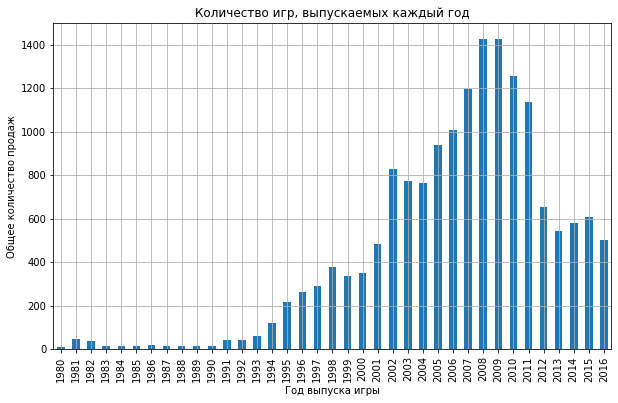

In [13]:
(data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
 .plot(kind='bar', title='Количество игр, выпускаемых каждый год', grid=True, figsize = (10, 6), 
       legend = False, ylabel = 'Общее количество продаж', xlabel = 'Год выпуска игры')
);

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍</font><br>
<font color='DarkMagenta'>👉 А вот подписи по оси Y явно не хватает. Это относится и к некоторым другим графикам проекта.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Спасибо, исправила в этом пункте и далее.<i>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br><font color='DarkGreen'>👌 Красивые и информативные графики всегда приветствуются, особенно когда на них есть все подписи осей, названия меток и название графика. В презентацию реального проекта в основном идут именно скрины графиков, таблицы мало информативны. По этому лучше сразу графики максимально описывать.</font>

В данных представлена информация об играх, начиная с 1980 года. Определенно, не все года следует включать в исследование, чтобы спрогнозировать ситуацию на рынке игр в 2017 году. 

Определим, как изменялись продажи по платформам. 

In [14]:
top_platforms = data.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False).reset_index()
top_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Отберем топ-7 платформ с наибольшими суммарными продажами и изучим динамику в разрезе каждого года. Предлагаем отобрать именно 7 компаний, т.к. 7-я в рейтинге консоль - PS4. Таким образом, в исследование попадут сразу 4 поколения консолей PlayStation.

In [15]:
top_platforms = top_platforms.head(7)

Рассмотрим детально график продаж каждой из платформ в отдельности:

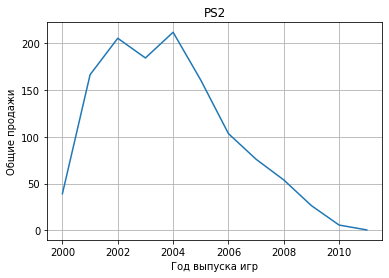

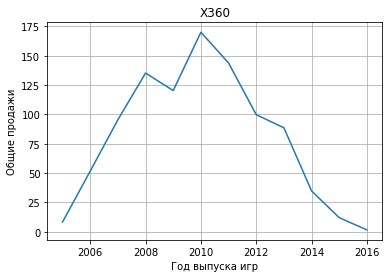

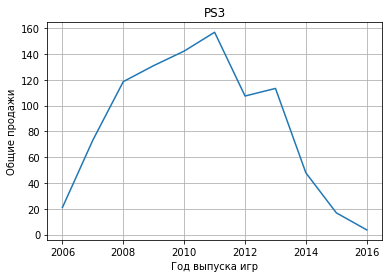

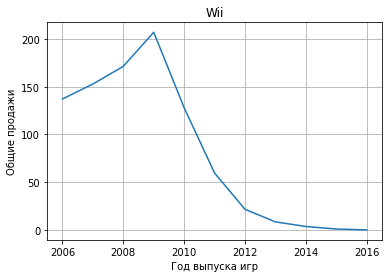

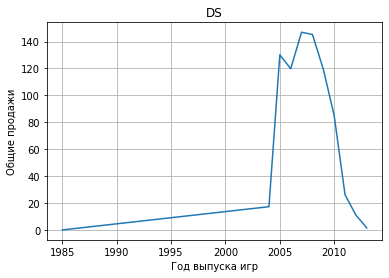

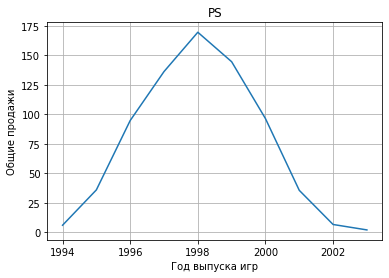

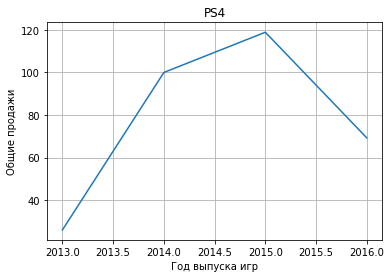

In [16]:
for i in top_platforms['platform']:
    (data[data['platform']==i]
 .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
 .plot(grid = True, legend = False, title = i, ylabel = 'Общие продажи', xlabel = 'Год выпуска игр'));

На графиках видно, что продажи игр на некоторых платформах завершились до 2016 года.

Отразим на графике сразу все 7 консолей, чтобы определить наличие закономерностей и цикл жизни консолей.

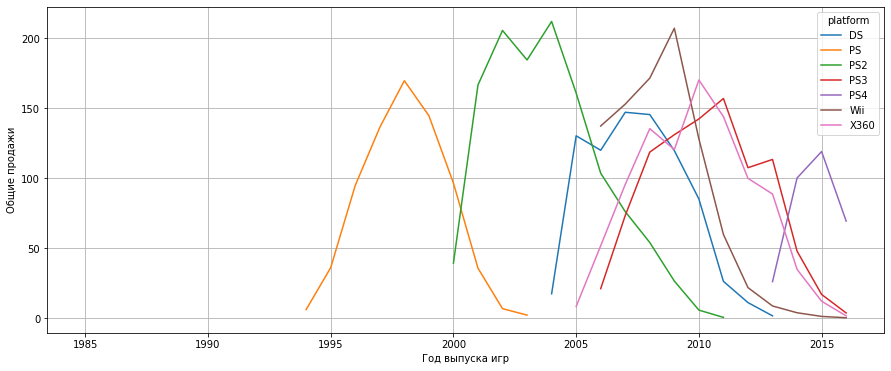

In [17]:
(data[data['platform'].isin(top_platforms['platform'])]
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(grid = True, figsize = (15, 6),  ylabel = 'Общие продажи', xlabel = 'Год выпуска игр'));

На примере семейства консолей PlayStation прослеживается следующая цикличность:
- 1 поколение консолей (1 платформа) живет около 10 лет. По истечении этого срока продажи игр для данной платформы падают почти до 0;
- Новые платформы появляются раз в ~6-7 лет. Этот цикл прослеживается как внутри консолей одного производителя, так и при появлении платформы аналогичного поколения у другого производителя (PS2 -> PS3, PS2 -> X360, PS2 -> Wii);
- Снижение количества продаж игр для платформы текущего поколения происходит до выхода консоли нового поколения. Вероятно это связано с тем, что примерно в этот период производители анонсируют производство новой консоли. Это приводит к тому, что разработчики игр начинают выпускать меньше игр для текущей платформы и ведут разработку для новой платформы.

Для прогнозирования продаж игр в 2017 году, необходимо из исходного датасета отобрать только актуальные данные. Такими данными можно считать все продажи игр от момента выхода платформы последнего поколения, т.е. с 2013 года (год выхода PS4).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

In [18]:
actual_data = data[data['year_of_release'] >= 2013].copy()

Определим топ-7 платформ на основе актуальных данных.

In [19]:
top7_actual = (actual_data.pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum')
 .sort_values(by='total_sales', ascending = False).reset_index().head(7))
top7_actual

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43


Топ-7 платформ на основе актуальных данных отличаются от топ-7 платформ, определенных ранее на основе всего датасета. Например, отсутствуют платформы PS, PS2, т.к. после 2013 года игры на этих платформах не выходят. Соответственно, строить прогноз по данным этих платформ было бы неверно. Потенциальная прибыль может быть получена только с тех платформ, для которых игры еще будут выпускаться не один год.

Построим диаграммы размаха для всех платформ.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А почему мы строим диаграммы размаха с фильтрацией по платформам? В задании топ-платформы не требуются, предполагаются все. Мы таким образом теряем часть информации. И диаграммы размаха надо строить в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами. Для вывода только нижней части boxplot-ов необходимо использовать параметр ylim. </font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Использовала фильтр, т.к. думала, что так будет нагляднее. Исправила ошибки ниже и комментарий выше.<i>

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

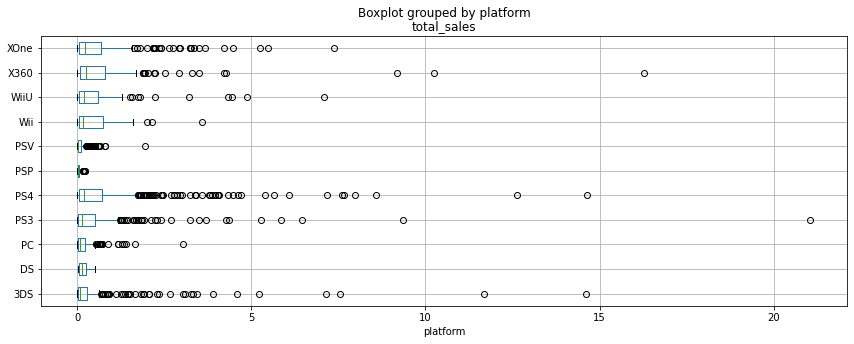

In [20]:
actual_data.boxplot(column = 'total_sales', by = 'platform', vert = False, figsize = (14,5))

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А зачем мы фильтруем выбросы, можно ли считать случайным, что несколько миллионов пользователей купили игру?.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Действительно не можем, я думала об этом, но не поняла изначально, для чего вообще хотят диаграмму размаха в этом задании. Сейчас, как мне видится, цель ее - сравнить медианные значения по кжадой из платформ. <br>
Убрала брок с удалением выбросов, построила боксплоты в другом масштабе, скорректировала выводы.<i>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Вспоминаем, что нам показывает диаграмма размаха:</font>
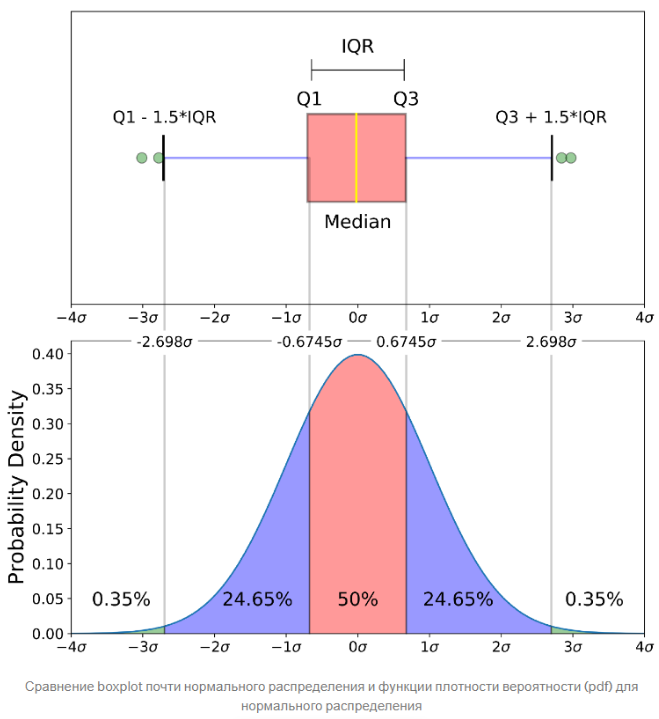

В данных присутствуют выбросы. Это вероятно говорит о том, что для каждой платформ были выпущены очень популярные игры, которые приобрело значительное количество пользователей. Это могут быть так же и эксклюзивные игры, выпущенные специально для данной платформы.

Построим повторно диаграммы размаха, но в другом масштабе, чтобы оценить разброс медианных значений по каждой из платфом.

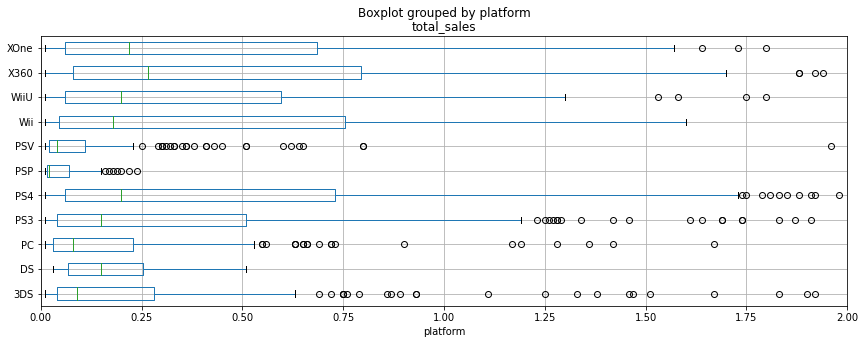

In [21]:
ax = actual_data.boxplot(column = 'total_sales', by = 'platform', vert = False, figsize = (14,5))
ax.set_xlim(0, 2);

Наибольшее медианное значение у платформы X360. Следом за ней идут платформы XOne, PS4, WiiU. <br>
Наибольший разброс покупаемости игр наблюдается для платформ X360 и PS4.

Рассмотрим детально продажи по платформе X360. Определим на ее примере, как влияют на продажи отзывы пользователей и критиков.

In [22]:
print("Корреляция между оценками критиков и общими продажами составляет:", 
      round(actual_data.query('platform == "X360"')['total_sales'].corr(actual_data.query('platform == "X360"')['critic_score']),3))

Корреляция между оценками критиков и общими продажами составляет: 0.35


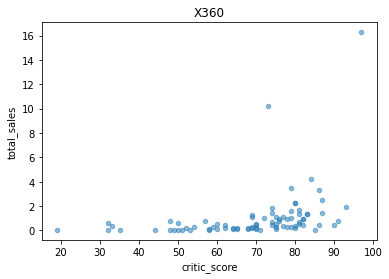

In [23]:
actual_data.query('platform == "X360"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, title = 'X360');

In [24]:
print("Корреляция между оценками пользователей и общими продажами составляет:", 
      round(actual_data.query('platform == "X360"')['total_sales'].corr(actual_data.query('platform == "X360"')['user_score']),3))

Корреляция между оценками пользователей и общими продажами составляет: -0.012


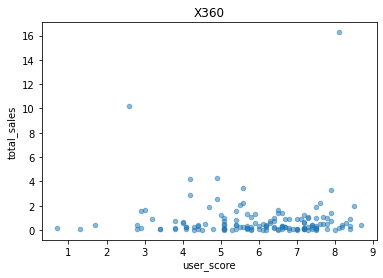

In [25]:
actual_data.query('platform == "X360"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, title = 'X360');

- На примере X360 прослеживается среднеслабая зависимость между оценками критиков и общими продажами игр по данной платформе. Такая зависимость означает, что высокие оценки критиков могут сказаться положительно на количестве продаваемых игр для данной платформы, однако, это не является решающим фактором для покупателей.


- Зависимость между оценками пользователей и общими продажами почти полностью отсутствует. Можно предположить, что в эпоху интернета покупатели игр перестали смотреть на оценки пользователей, т.к. они слишком субъективны.

Проверим для топ-7 платформ зависимости между продажами и оценками.

In [26]:
print("Корреляция между оценками критиков и общими продажами для топ-7 платформ:")
for i in top7_actual.platform.unique():
    print(i,round(actual_data.query('platform == @i')['total_sales'].corr(actual_data.query('platform == @i')['critic_score']), 2))

Корреляция между оценками критиков и общими продажами для топ-7 платформ:
PS4 0.41
PS3 0.33
XOne 0.42
3DS 0.36
X360 0.35
WiiU 0.38
PC 0.2


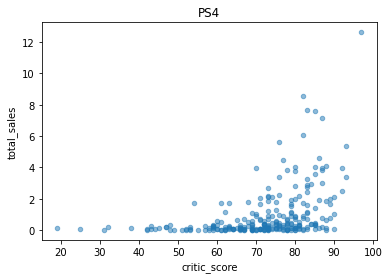

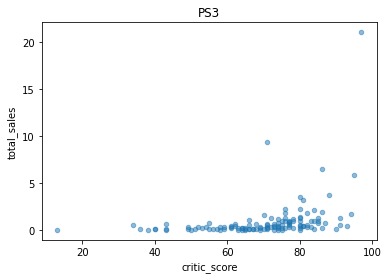

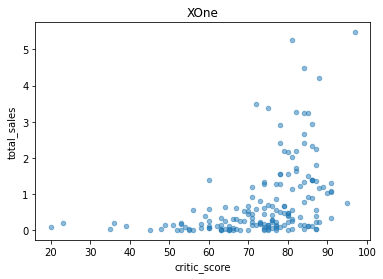

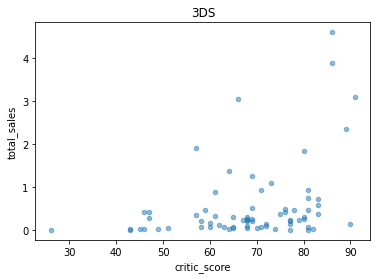

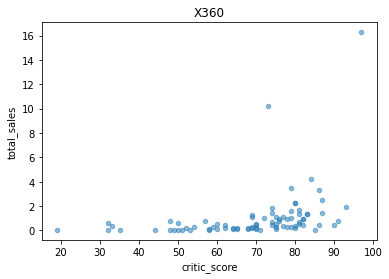

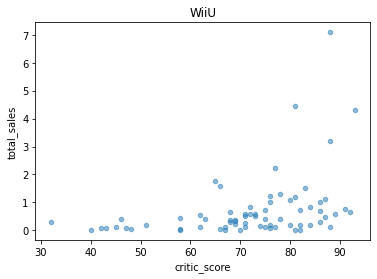

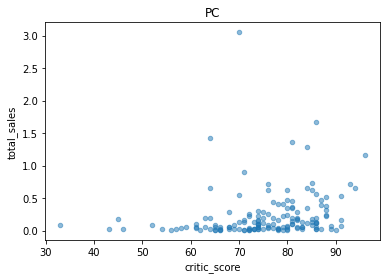

In [27]:
for i in top7_actual.platform.unique():
    actual_data.query('platform == @i').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, title = i);

In [28]:
print("Корреляция между оценками пользователей и общими продажами для топ-7 платформ:")
for i in top7_actual.platform.unique():
    print(i,round(actual_data.query('platform == @i')['total_sales'].corr(actual_data.query('platform == @i')['user_score']), 2))

Корреляция между оценками пользователей и общими продажами для топ-7 платформ:
PS4 -0.03
PS3 0.0
XOne -0.07
3DS 0.24
X360 -0.01
WiiU 0.42
PC -0.09


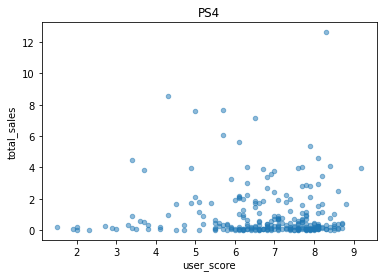

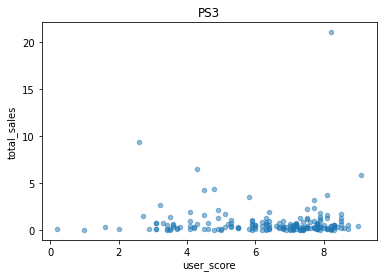

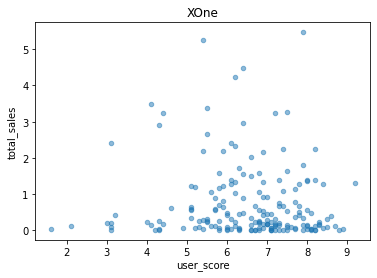

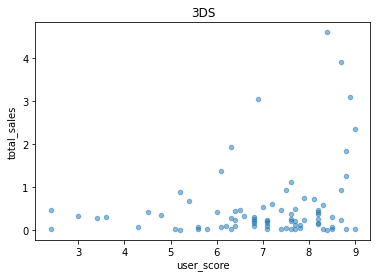

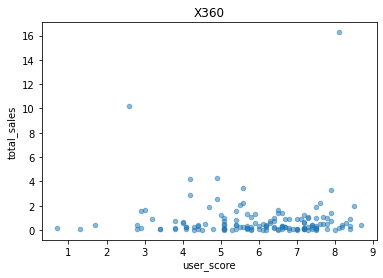

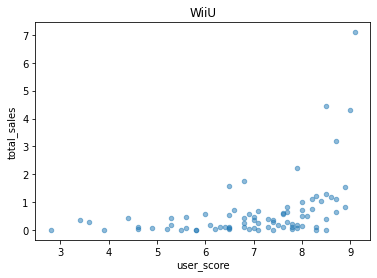

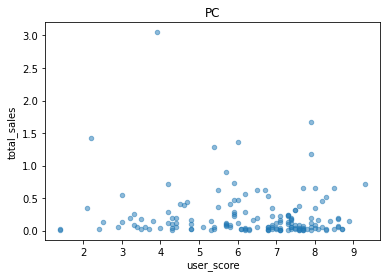

In [29]:
for i in top7_actual.platform.unique():
    actual_data.query('platform == @i').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, title = i);

Проверка зависимостей между оценками и продажами для топ-7 платформ подтвердила те же выводы, что были получены на примере X360.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну, а по остальным только посчитали корреляцию. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Добавила к расчету корреляции еще и построение диаграмм для топ-7 платформ. <i>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
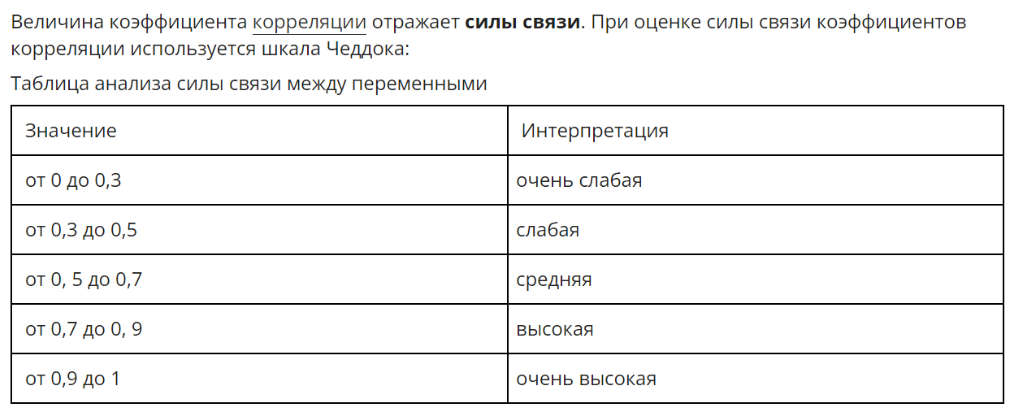

Изучим распределение игр по жанрам и определим самые популярные и прибыльные жанры.

Для начала оценим распределение продаж по жанрам на основе диаграммы размаха.

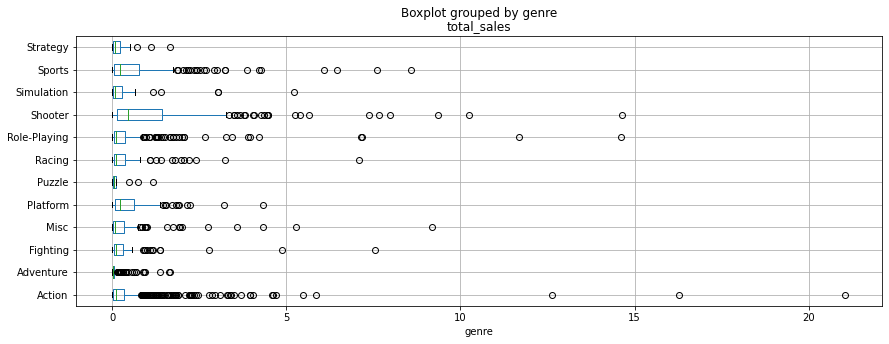

In [30]:
actual_data.boxplot(column = 'total_sales', by = 'genre', vert = False, figsize = (14,5));

На диаграмме видно, что для некоторых жанров, например, Action, выходили игры, проданные в значительном количестве. Эти продажи никак не характеризуют жанр в целом, т.к. это точечные успехи отдельных игр на отдельных платформах.  <br>
Наибольший разброс покупаемости игр наблюдается для жанра Shooter. Для этого же жанра видим наибольшее медианное значение продаж.

Для определения наиболее популярных жанров сравним медианные значения продаж по каждому жанру. 

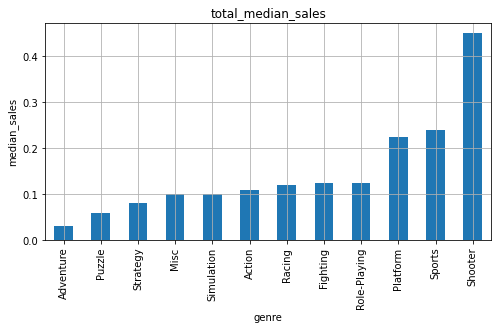

In [31]:
(actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
 .sort_values(by = 'total_sales')
 .plot(kind='bar', title='total_median_sales', grid=True, figsize = (8, 4), legend = False, ylabel = 'median_sales')
);

Самый популярный жанр - это Shooter. Игры данного жанра распродаются лучше всего, на них есть устойчивый спрос.
Следующие по популярности жанры - Sports, Platform, Role-Playing, Fighting.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы. Сделаем?</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i> Благодарю, теперь вижу свою ошибку. Исправила выше код + выводы. <i> 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.</font>

### Изучение пользователей по регионам

Определим топ-5 популярных платформ и жанров для каждого региона NA, EU, JP.

In [32]:
#считаем продажи в каждом регионе по каждой платформе
top_pl = actual_data.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

In [33]:
#определяем топ-5 платформ в регионе NA
top_pl_na = top_pl.sort_values(by = 'na_sales', ascending = False).head(5).index
#все остальные платформы, кроме топ-5, заменяем на значение other. Сохраняем результат в отдельное поле. 
#По нему будет агрегировать данные.
actual_data.loc[:, 'top_pl'] = actual_data.loc[:, 'platform'].where(actual_data['platform'].isin(top_pl_na), 'other')
#агрегируем данные снова по полученным платформам, эти значения затем выведем на график
top_pl_na = actual_data.groupby('top_pl').agg({'na_sales':'sum'}).sort_values(by = 'na_sales')

In [34]:
#определяем топ-5 платформ в регионе EU
top_pl_eu = top_pl.sort_values(by = 'eu_sales', ascending = False).head(5).index
actual_data.loc[:, 'top_pl'] = actual_data.loc[:, 'platform'].where(actual_data['platform'].isin(top_pl_eu), 'other')
top_pl_eu = actual_data.groupby('top_pl').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales')
#определяем топ-5 платформ в регионе JP
top_pl_jp = top_pl.sort_values(by = 'jp_sales', ascending = False).head(5).index
actual_data.loc[:,'top_pl'] = actual_data.loc[:, 'platform'].where(actual_data['platform'].isin(top_pl_jp), 'other')
top_pl_jp = actual_data.groupby('top_pl').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales')

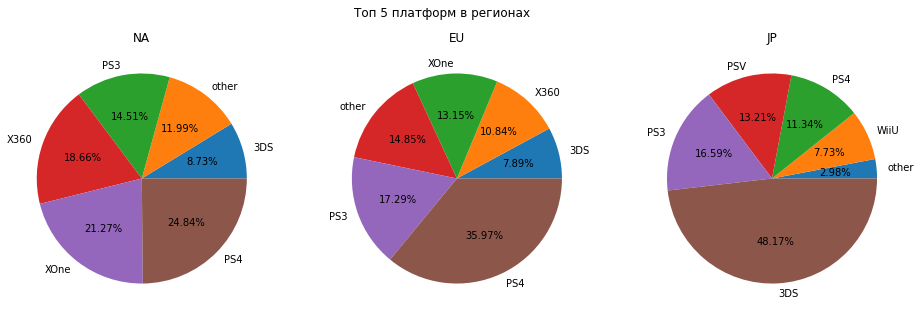

In [35]:
#выводим три пайчарта диаграммы рядом по каждому региону
plt.figure(figsize=(16, 5)).suptitle('Топ 5 платформ в регионах');
plt.subplot(1, 3, 1)
plt.pie(top_pl_na['na_sales'], labels = top_pl_na.index, normalize=True, autopct='%.2f%%');
plt.title('NA')
plt.subplot(1, 3, 2)
plt.pie(top_pl_eu['eu_sales'], labels = top_pl_eu.index, normalize=True, autopct='%.2f%%');
plt.title('EU')
plt.subplot(1, 3, 3)
plt.pie(top_pl_jp['jp_sales'], labels = top_pl_jp.index, normalize=True, autopct='%.2f%%');
plt.title('JP');

В регионах NA и EU наибольшую популярность имеет новая платформа PS4.

В NA так же популярны платформы семейства X360 и XOne. Скорее всего это объясняется тем, что обе платформы выпущены компанией Microsoft и NA - нативный регион компании.

В регионе JP так же лидируют платформы, выпущенные компаниями этого региона. Отличие региона JP от остальных еще и в том, что наибольшие продажи происходят по "карманным" консолям.

In [36]:
#считаем медианные продажи в каждом в регионе по каждому жанру
top_gr = actual_data.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'median')
#определяем топ-5 жанров в регионе EU
top_gr_na = top_gr.sort_values(by = 'na_sales', ascending = False).head(5).index
actual_data.loc[:, 'top_gr'] = actual_data.loc[:, 'genre'].where(actual_data['genre'].isin(top_gr_na), 'other')
top_gr_na = actual_data.groupby('top_gr').agg({'na_sales':'median'}).sort_values(by = 'na_sales')
#определяем топ-5 жанров в регионе EU
top_gr_eu = top_gr.sort_values(by = 'eu_sales', ascending = False).head(5).index
actual_data.loc[:,'top_gr'] = actual_data.loc[:, 'genre'].where(actual_data['genre'].isin(top_gr_eu), 'other')
top_gr_eu = actual_data.groupby('top_gr').agg({'eu_sales':'median'}).sort_values(by = 'eu_sales')
#определяем топ-5 жанров в регионе JP
top_gr_jp = top_gr.sort_values(by = 'jp_sales', ascending = False).head(5).index
actual_data.loc[:,'top_gr'] = actual_data.loc[:, 'genre'].where(actual_data['genre'].isin(top_gr_jp), 'other')
top_gr_jp = actual_data.groupby('top_gr').agg({'jp_sales':'median'}).sort_values(by = 'jp_sales')

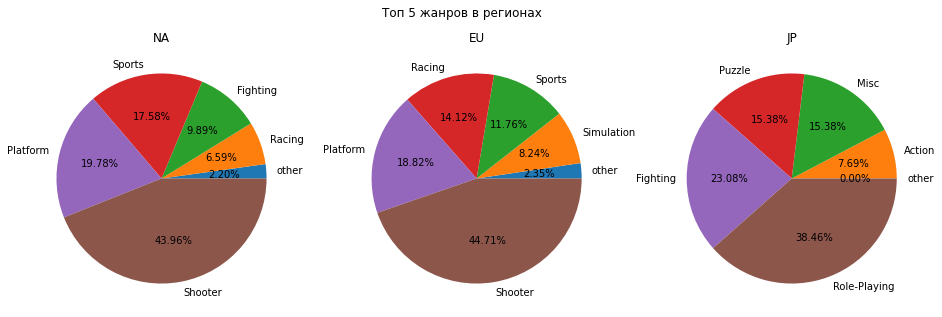

In [37]:
#выводим три пайчарта диаграммы рядом по каждому региону
plt.figure(figsize=(16, 5)).suptitle('Топ 5 жанров в регионах');
plt.subplot(1, 3, 1)
plt.pie(top_gr_na['na_sales'], labels = top_gr_na.index, normalize=True, autopct='%.2f%%');
plt.title('NA')
plt.subplot(1, 3, 2)
plt.pie(top_gr_eu['eu_sales'], labels = top_gr_eu.index, normalize=True, autopct='%.2f%%');
plt.title('EU')
plt.subplot(1, 3, 3)
plt.pie(top_gr_jp['jp_sales'], labels = top_gr_jp.index, normalize=True, autopct='%.2f%%');
plt.title('JP');

Популярность жанров по регионам исследована не по общему числу продаж, а по медианным значениям, т.к. игры выходят на разные платформы и успех одной игры для одной платформы может быть непоказателен.

Во регионах NA и EU лидирует жанр Shooter. 

В регионе JP можно выделить жанр Role-Playing, который не отличается такой же значимой популярностью в остальных регионах.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А у нас в задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Сделаем? Примерно вот так:</font>
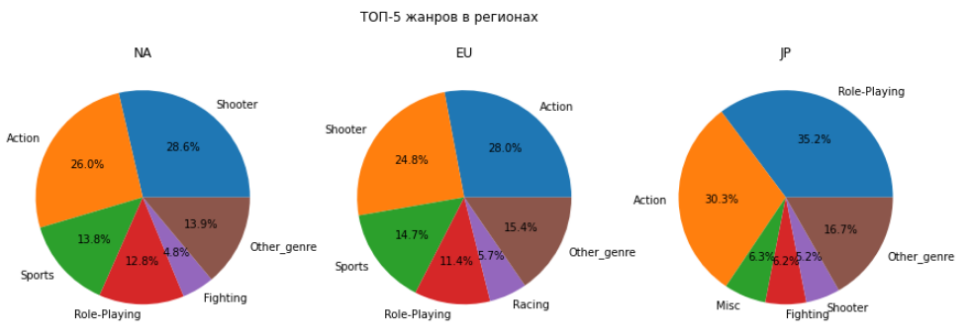

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i> На вебинарах от Яндекса и, кажется, в тренажере были рекомендации не строить круговые диаграммы. Именно по этому я строила столбчатые изначально. Анализ по топ-5 + общая группа other у меня и были. <br>
Изменила графики на пайчарты, так же в расчетах выше изменила агрегирующую функцию для жанров - сумму заменила на медиану. Скорректировала выводы. <br> 
Скажи, пожалуйста, ведь правильно именно median брать для жанров и в разрезе региона? А правильно ли, что для платформ уже можно смотреть общую сумму продаж при анализе региона? <i> 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец! <br>Теперь на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.<br>Медиана нам показывает где находятся максимальные продажи из всего распределения, но нам в данном случае такая агрегация не нужна. Суммы по регионам нам показывают емкость регионального рынка, а пироги нам показывают как этот региональный рынок поделили платформы/жанры. Это разные графики и они показывают разные бизнес сущности. Объяснил?</font>

Проверим, как рейтинг ESRB влияет на продажи в разных регионах. ESRB - организация, которая присваивает рейтинг игр для США и Канады. т.е. для региона NA.

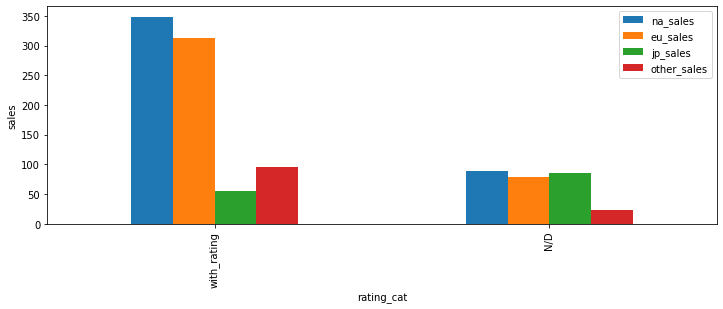

In [38]:
actual_data.loc[:, 'rating_cat'] = actual_data.loc[:, 'rating'].where(actual_data['rating'] == 'N/D', 'with_rating')
(actual_data.groupby('rating_cat').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
 .sort_values(by = 'na_sales', ascending = False)
 .plot(kind = 'bar', figsize = (12, 4), ylabel = 'sales'));

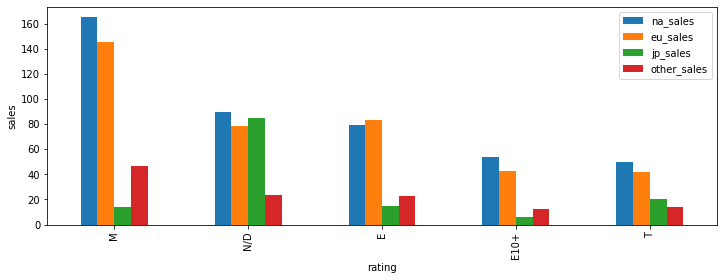

In [39]:
(actual_data.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
 .sort_values(by = 'na_sales', ascending = False)
 .plot(kind = 'bar', figsize = (12, 4), ylabel = 'sales'));

Для региона NA ожидаемо наличие рейтинга сказывается на продажах: в большей степени продаются игры с рейтингом, чем без. Отсутствие рейтинга для игр с ненулевыми продажами в регионе NA может быть связано с тем, что источник исходных данных был не актуализирован и на самом деле рейтинги были присвоены.

Для региона JP наличие рейтинга не влияет на продажи, т.к. для этого региона рейтинги играм проставляет другая организация.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных не поставили заглушку на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [40]:
# Комментарий ревьюера
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


N/D     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Добавила заглушку, скорректировала барчарт и вывод. <i>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данным и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

### Проверка гипотез

1) Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Нулевая гипотеза (H_0)**: Средний пользовательский рейтинг user_score платформы Xbox One = Средний пользовательский рейтинг user_score платформы PC <br>
**Альтернативная гипотеза (H_1)**: Средний пользовательский рейтинг user_score платформы Xbox One != Средний пользовательский рейтинг user_score платформы PC

Обе выборки независимы. Уровень значимости примем равным 0.05.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [41]:
sample_1 = actual_data.query('platform == "XOne"')['user_score']
sample_2 = actual_data.query('platform == "PC"')['user_score']

alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(sample_1, sample_2, equal_var=False, #нет оснований, что дисперсии ген. совокупностей совпадают 
                       nan_policy = 'omit' #игнорируем Nan значения
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font><br>
<font color='DarkGreen'>👌 Хорошо, что использован параметр отфильтровывющий пропуски. 👍</font>

Исходная гипотеза о равенстве средних пользовательских рейтингов Xbox One и PC подтвердилась.

2) Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза (H_0)**: Средний пользовательский рейтинг user_score жанра Action = Средний пользовательский рейтинг user_score жанра Sports <br>
**Альтернативная гипотеза (H_1)**: Средний пользовательский рейтинг user_score жанра Action != Средний пользовательский рейтинг user_score жанра Sports

Обе выборки независимы. Уровень значимости примем равным 0.05.

In [42]:
sample_1 = actual_data.query('genre == "Action"')['user_score']
sample_2 = actual_data.query('genre == "Sports"')['user_score']

alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(sample_1, sample_2, equal_var=False, #нет оснований, что дисперсии ген. совокупностей совпадают 
                       nan_policy = 'omit'  #игнорируем Nan значения
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу


Исходная гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports подтвердилась.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Добавила ниже.<i>

Для демонстрации подтверждения гипотез рассчитаем средние пользовательские рейтинги по платформам и жанрам, которые проверяли выше.

In [43]:
actual_data.query('platform in ("XOne", "PC")').groupby('platform')['user_score'].agg('mean')

platform
PC      6.269677
XOne    6.521429
Name: user_score, dtype: float64

In [44]:
actual_data.query('genre in ("Action", "Sports")').groupby('genre')['user_score'].agg('mean')

genre
Action    6.837532
Sports    5.238125
Name: user_score, dtype: float64

Действительно, средние рейтинги пользователей оказались равны при сравнении платформ XOne и PC и не равны при сравнении жанров Action и Sports.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Правильно, что показаны средние пользовательские рейтинги. 👍 Это позволяет нам проверить не ошиблись ли мы, если они расходятся с тестом Стьюдента.</font>

### Общий вывод

Целью исследования было изучение данных о продажах игр за предыдущие года для планирования рекламных кампаний на предстоящий год и определение перечня потенциально прибыльных игр для продажи в интернет-магазине.

Были изучены исторические данные из открытых источников о продажах игр по всему миру с 1980 года. Было выявлено, что новые платформы появляются раз в ~6-7 лет. Этот цикл прослеживается как внутри консолей одного производителя, так и при появлении платформы аналогичного поколения у другого производителя. Для прогнозирования продаж игр в 2017 году, было решено исследовать только данные после 2013 года, т.е. с момента выхода платформы последнего поколения (PS4).

Итоги исследования:
1. Самые прибыльные платформы PS4, PS3, XOne. Это консоли двух поколений: уходящего (PS3, XOne) и пришедшего ему на смену (PS4). Для проведения рекламных кампаний следует сделать ставку на игры для новой платформы PS4, т.к. выпуск игр для нее и, соответственно, продажи  будут только расти.
2. Между оценками критиков и общими продажами игр обнаружена среднеслабая зависимость. Зависимость между оценками пользователей и общими продажами почти полностью отсутствует. Это означает, что на оценки в целом не стоит обращать внимание при проведении кампании. Однако, игры с высокими оценками критиков вероятнее будут лучше продаваться.
3. Для регионов NA и EU следует в первую очередь рекламировать игры жанра Shooter, т.к. это наиболее популярный жанр. Для NA так же важно, чтобы для этих игр был проставлен рейтинг ESRB, т.к. именно игры с проставленным рейтингом распродаются в этом регионе больше всего. <br> Для региона JP следует сделать ставку на игры жанра Role-Playing.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, но они же не аналитики, им надо пальцем показать, точнее акцентировать их креативное внимание. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Наталия, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Построить диаграмму размаха по глобальным продажам игр в разбивке по всем платформам. На диаграммах размаха добавить масштабированную диаграмму. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж и построить диаграммы размаха. Переделать анализ влияния рейтинга ESRB на продажи в регионах.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

</font><font color='Blue'><b>Комментарий студента 1</b></font><br>
<i>Спасибо! Скорректировала общий вывод и исправила указанные ошибки.<i>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Наталия! Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
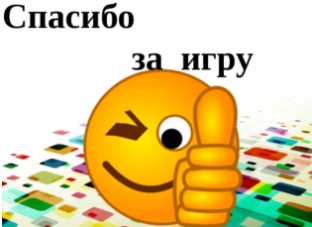